# Credit Card Fraud Detection

The data used for this notebooks has already had principle component analysis
(PCA) applied for confidentiality. A neural network is trained to
identify credit card fraud.

Dataset available at https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2021-11-03 18:18:27.877475: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
df = pd.read_csv('data/creditcard.csv', header=0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
fraud_percent = np.sum(df['Class']) / len(df['Class'])

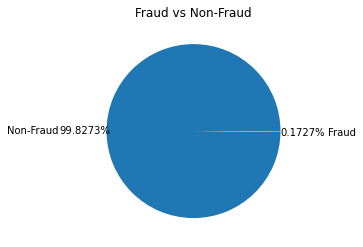

In [8]:
# plot the amound of fraud vs non-fraud cases
fig, ax = plt.subplots()
ax.pie([1.0 - fraud_percent, fraud_percent],
       labels=['Non-Fraud', 'Fraud'],
       autopct='%1.4f%%',
       pctdistance=1.25,
       labeldistance=1.55)
plt.title('Fraud vs Non-Fraud')
plt.savefig('images/pie.png')


In [9]:
# split test and training data
X = df.drop(columns='Class')
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# create neural network
lr = 2e-3
model = Sequential([
    Dense(10, input_dim=30),
    LeakyReLU(alpha=lr),
    Dropout(0.2),
    Dense(10),
    LeakyReLU(alpha=lr),
    Dense(10),
    LeakyReLU(alpha=lr),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2021-11-03 18:18:30.126199: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-03 18:18:30.126707: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-03 18:18:30.191135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 18:18:30.191506: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:27:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-11-03 18:18:30.191523: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-03 18:18:30.192413: I tensorflow/stream_executor/platform/def

2021-11-03 18:18:30.610048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-03 18:18:30.610409: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600015000 Hz


Epoch 1/20
  41/4771 [..............................] - ETA: 5s - loss: 0.5304 - accuracy: 0.8399   

2021-11-03 18:18:30.934381: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


4771/4771 [==============================] - 9s 2ms/step - loss: 0.0571 - accuracy: 0.9931 - val_loss: 0.0029 - val_accuracy: 0.9986
Epoch 2/20
4771/4771 [==============================] - 9s 2ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 3/20
4771/4771 [==============================] - 9s 2ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 4/20
4771/4771 [==============================] - 9s 2ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0022 - val_accuracy: 0.9996
Epoch 5/20
4771/4771 [==============================] - 9s 2ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 6/20
4771/4771 [==============================] - 9s 2ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 7/20
4771/4771 [==============================] - 8s 2ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0026 - val_accuracy: 0.9996
Epo

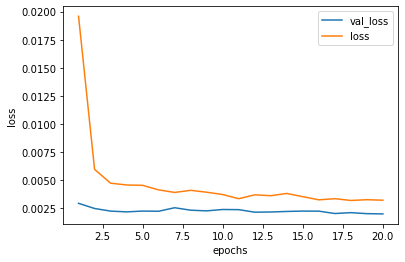

In [11]:
# train neural network
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)
fig, ax = plt.subplots()
ax.plot(range(1, epochs+1), history.history['val_loss'], label='val_loss')
ax.plot(range(1, epochs+1), history.history['loss'], label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.savefig('images/loss.png')

In [12]:
loss, acc = model.evaluate(X_test, y_test)
print('Model Test Accuracy: ', acc)


2938/2938 [==============================] - 3s 911us/step - loss: 0.0039 - accuracy: 0.9994
Model Test Accuracy:  0.99943608045578
